In [61]:
import numpy as np
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import importlib

import matplotlib.cm as cm

import os
import operator
import xlrd

In [51]:
replicas = [61, 57]

#tracing how the energy of a specific replica (at a specific chi value) changes across savepoints

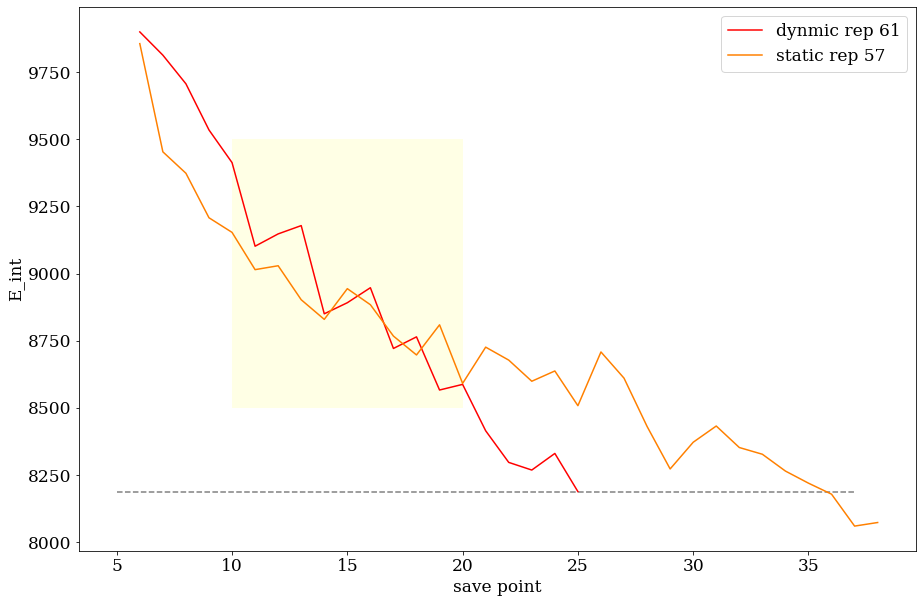

In [101]:
rep_hist_path = "C:\\users/Thomas/wlcsim_membrane/data/rep_hists/"
os.chdir(rep_hist_path)

plt.figure(figsize=(15,10))
font = {'family' : 'serif',
    'weight':'normal',
    'size': 17}
plt.rc('font', **font)

r_df_list = []
v_val_list = []
plot = [True, False, False, True]
i = 0
COLOR = iter(cm.autumn(np.linspace(0, 1, len(replicas)+5)))

for file in os.listdir():
    file_path = f"{rep_hist_path}\{file}"
    file_label = file_path[-11:-5]
    wb = xlrd.open_workbook(file_path)
    ws = wb.sheet_by_index(0)
    rep_list = np.array(ws.col_values(0)[1:])
    #chi_list = np.array(ws.col_values(5)[1:])
    #sum_list = np.array(ws.col_values(6)[1:])
    
    for rep in replicas:
        chi_list = np.array(ws.col_values(5)[(63*5)+1+rep::63]) # skiping first 5 savepoints
        sum_list = np.array(ws.col_values(6)[(63*5)+1+rep::63])
        clr = next(COLOR)
        energy = chi_list * sum_list
        if plot[i]:
            plt.plot(np.arange(len(energy)+6)[6:], energy, label = str(file_label) + " rep " + str(rep), color = clr)
        i += 1
plt.hlines(1.8768580 * 4362.90939, 5, 37, color = "black", alpha = 0.5, linestyle = "dashed")
plt.legend()
plt.xlabel(r"save point") #R_m*
plt.ylabel(r'E_int')

rec = plt.Rectangle((10, 8500), 10, 1000, fc = 'yellow', alpha = 0.1)
plt.gca().add_patch(rec)

